# Region Perturbation

Demo of Region Perturbation algorithm with inpainting and random perturbation modes.

In [1]:
%load_ext autoreload
%autoreload 2

## LRP

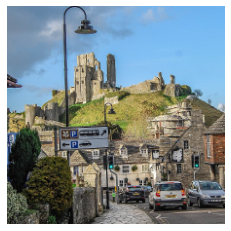

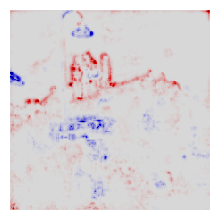

In [2]:
from typing import Callable, Dict, List, Tuple, Union

import numpy
import torch
import torchvision
from matplotlib import pyplot as plt

import lrp.plot
from lrp import image, rules
from lrp.core import LRP
from lrp.filter import LayerFilter
from lrp.rules import LrpEpsilonRule, LrpGammaRule, LrpZBoxRule, LrpZeroRule
from lrp.zennit.types import AvgPool, Linear

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one(
    '../../../data/castle.jpg')
X = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)
# Simulate batch by adding a new dimension
X = torch.unsqueeze(X, 0)

plt.axis('off')
lrp.plot.plot_imagenet(X)

# Model
model = torchvision.models.vgg16(pretrained=True)
model.eval()

# Low and high parameters for zB-rule
batch_size: int = 1
shape: Tuple[int] = (batch_size, 3, 224, 224)

low: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.zeros(*shape))
high: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.ones(*shape))

# Init layer filter
vgg16_target_types: Tuple[type] = (Linear, AvgPool)
filter_by_layer_index_type: LayerFilter = LayerFilter(model)
filter_by_layer_index_type.set_target_types(vgg16_target_types)

name_map: List[Tuple[List[str], rules.LrpRule,
                     Dict[str, Union[torch.Tensor, float]]]]
name_map = [
    (filter_by_layer_index_type(lambda n: n == 0), LrpZBoxRule, {'low': low, 'high': high}),
    (filter_by_layer_index_type(lambda n: 1 <= n <= 16), LrpGammaRule, {'gamma': 0.25}),
    (filter_by_layer_index_type(lambda n: 17 <= n <= 30), LrpEpsilonRule, {'epsilon': 0.25}),
    (filter_by_layer_index_type(lambda n: 31 <= n), LrpZeroRule, {}),
]

lrp_instance: LRP = LRP(model)
lrp_instance.convert_layers(name_map)
R: torch.Tensor = lrp_instance.relevance(X)
lrp_instance.heatmap(R, width=2, height=2)

## Region Perturbation

Try Region Perturbation with inpainting enabled.

Finished '_flip' in 0.1455 secs
Finished '_flip' in 0.1472 secs
Finished '_flip' in 0.1499 secs
Finished '_flip' in 0.1483 secs
Finished '_flip' in 0.1519 secs
Finished '_flip' in 0.1507 secs
Finished '_flip' in 0.1628 secs
Finished '_flip' in 0.1632 secs
Finished '_flip' in 0.1570 secs
Finished '_flip' in 0.1550 secs
Finished '_flip' in 0.1585 secs
Finished '_flip' in 0.1609 secs
Finished '_flip' in 0.1556 secs
Finished '_flip' in 0.1573 secs
Finished '_flip' in 0.1546 secs
Finished '_flip' in 0.1604 secs
Finished '_flip' in 0.1643 secs
Finished '_flip' in 0.1611 secs
Finished '_flip' in 0.1662 secs
Finished '_flip' in 0.1687 secs
Finished '_flip' in 0.1687 secs
Finished '_flip' in 0.1649 secs
Finished '_flip' in 0.1667 secs
Finished '_flip' in 0.1690 secs
Finished '_flip' in 0.1671 secs
Finished '_flip' in 0.1648 secs
Finished '_flip' in 0.1674 secs
Finished '_flip' in 0.1558 secs
Finished '__call__' in 4.6186 secs


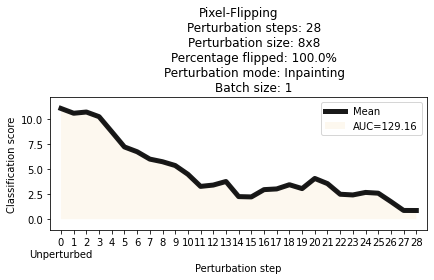

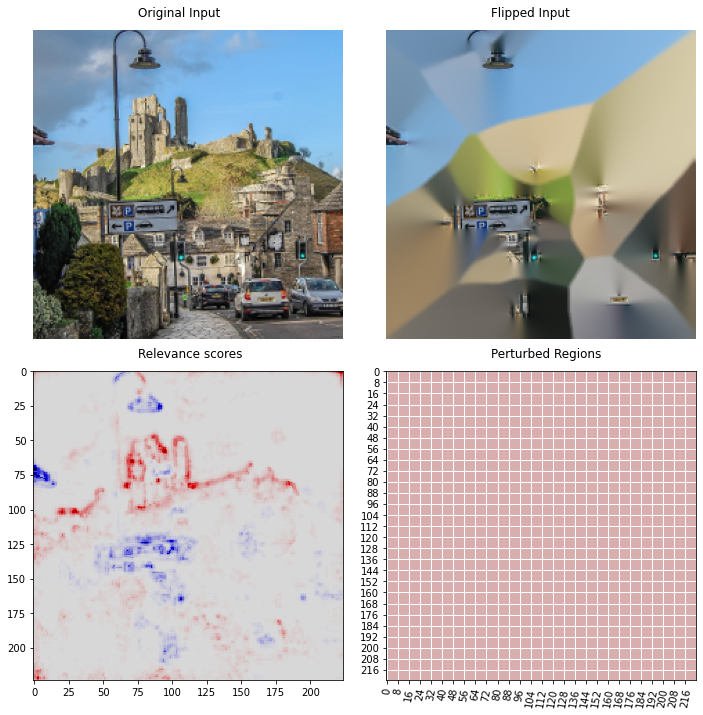

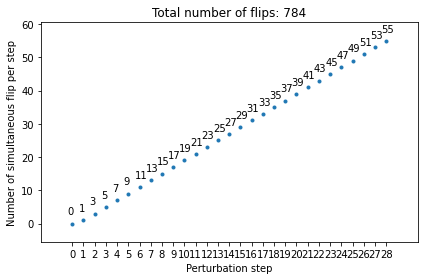

In [3]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 28
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.INPAINTING)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()

Finished '_flip' in 0.1625 secs
Finished '_flip' in 0.1474 secs
Finished '_flip' in 0.1502 secs
Finished '_flip' in 0.1529 secs
Finished '_flip' in 0.1496 secs
Finished '_flip' in 0.1442 secs
Finished '_flip' in 0.1425 secs
Finished '_flip' in 0.1413 secs
Finished '_flip' in 0.1466 secs
Finished '_flip' in 0.1500 secs
Finished '_flip' in 0.1514 secs
Finished '_flip' in 0.1455 secs
Finished '_flip' in 0.1588 secs
Finished '_flip' in 0.1516 secs
Finished '_flip' in 0.1605 secs
Finished '_flip' in 0.1574 secs
Finished '_flip' in 0.1549 secs
Finished '_flip' in 0.1524 secs
Finished '_flip' in 0.1501 secs
Finished '_flip' in 0.1476 secs
Finished '_flip' in 0.1492 secs
Finished '_flip' in 0.1520 secs
Finished '_flip' in 0.1556 secs
Finished '_flip' in 0.1503 secs
Finished '_flip' in 0.1857 secs
Finished '_flip' in 0.1590 secs
Finished '_flip' in 0.1617 secs
Finished '_flip' in 0.1589 secs
Finished '__call__' in 4.4424 secs


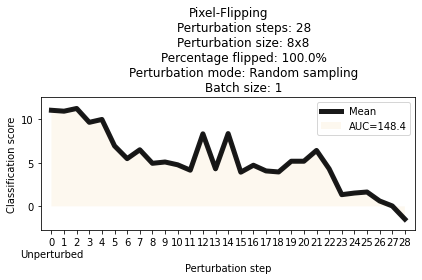

WARNING   Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


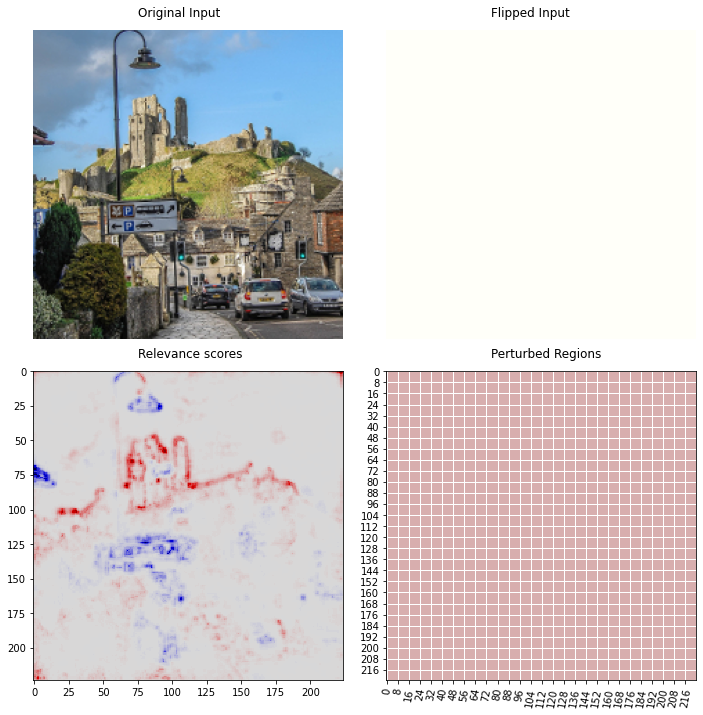

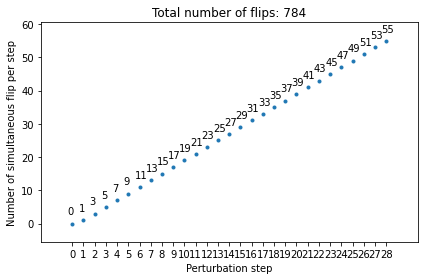

In [4]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 28
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.RANDOM)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()